<a href="https://colab.research.google.com/github/mralamdari/Computer-Vision-Projects/blob/main/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import model_selection

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]


x_train.shape, x_test.shape

4422102/4422102 [==============================] - 0s 0us/step


((60000, 28, 28, 1), (10000, 28, 28, 1))

In [3]:
def plot_images(test_imgs, changed_imgs, n=10):
  plt.figure(figsize=(20, 4))
  for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(test_imgs[i])
    plt.title('original')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(changed_imgs[i])
    plt.title('reconstructed')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

  plt.show()

#Basic autoencoder

In [ ]:
class AutoEncoder(tf.keras.models.Model):
  def __init__(self, latent_dim, shape):
    super(AutoEncoder, self).__init__()
    self.latent_dim = latent_dim
    self.shape = shape
    self.encoder = tf.keras.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(latent_dim, activation='relu')
    ])
    self.decoder  = tf.keras.Sequential([
        tf.keras.layers.Dense(tf.math.reduce_prod(shape), activation='sigmoid'),
        tf.keras.layers.Reshape(shape)
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [ ]:
shape = x_test.shape[1:]
latent_dim =  64
autoencoder= AutoEncoder(latent_dim, shape)

In [ ]:
autoencoder.compile(optimizer='adam',
                    loss=tf.keras.losses.MeanSquaredError())

In [ ]:
autoencoder.fit(x_train,
                x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.0236 - val_loss: 0.0132
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0117 - val_loss: 0.0106
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0102 - val_loss: 0.0098
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0095 - val_loss: 0.0094
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0092 - val_loss: 0.0092
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0091 - val_loss: 0.0092
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0088 - val_loss: 0.0090
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.008

In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

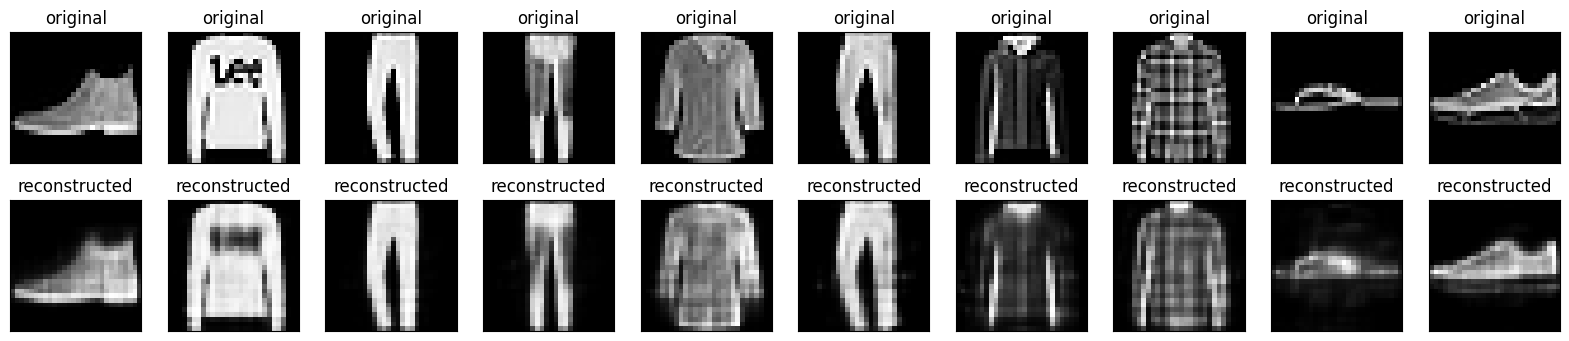

In [ ]:
plot_images(x_test, decoded_imgs, n=10)

# Image denoising

In [ ]:
#adding random noise to the images
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
x_test_noisy  = x_test  + noise_factor * tf.random.normal(shape=x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

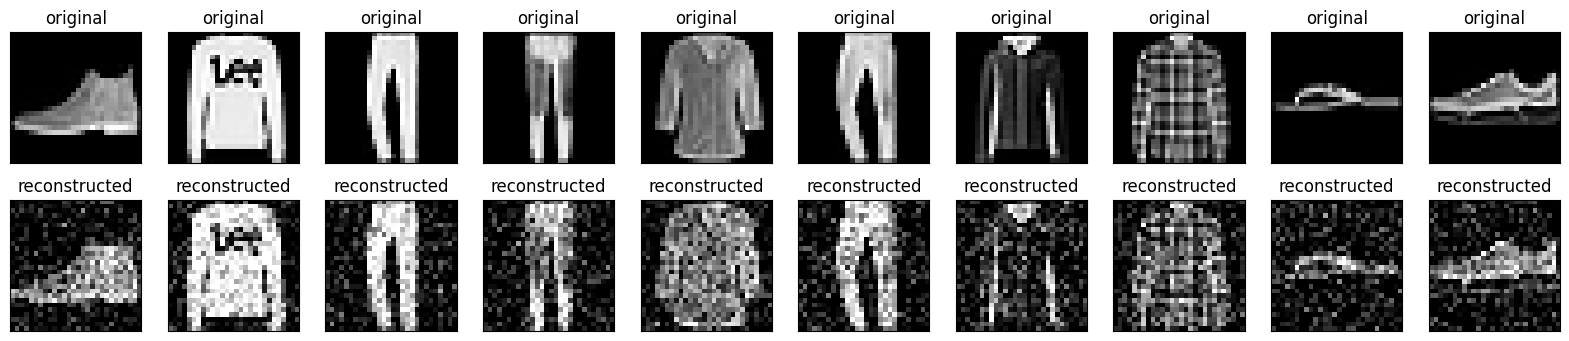

In [ ]:
plot_images(x_test, x_test_noisy, n=10)

convolutional autoencoder

In [ ]:
class Denoise(tf.keras.models.Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same', strides=2),
        tf.keras.layers.Conv2D(8, 3,  activation='relu', padding='same', strides=2)
    ])
    self.decoder = tf.keras.Sequential([
        tf.keras.layers.Conv2DTranspose(8, 3, activation='relu', padding='same', strides=2),
        tf.keras.layers.Conv2DTranspose(16,3, activation='relu', padding='same', strides=2),
        tf.keras.layers.Conv2D(1, 3, activation='sigmoid', padding='same')
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()

In [ ]:
autoencoder.compile(optimizer='adam',
                    loss=tf.keras.losses.MeanSquaredError())

In [ ]:
autoencoder.fit(x_train_noisy,
                x_train,
                epochs=20,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/20
1875/1875 [==============================] - 58s 30ms/step - loss: 0.0178 - val_loss: 0.0098
Epoch 2/20
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0090 - val_loss: 0.0085
Epoch 3/20
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0082 - val_loss: 0.0080
Epoch 4/20
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0078 - val_loss: 0.0077
Epoch 5/20
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0076 - val_loss: 0.0075
Epoch 6/20
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0075 - val_loss: 0.0075
Epoch 7/20
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0074 - val_loss: 0.0074
Epoch 8/20
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0073 - val_loss: 0.0073
Epoch 9/20
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0072 - val_loss: 0.0072
Epoch 10/20
1875/1875 [==============================] - 54s 29m

In [ ]:
encoded_imgs = autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

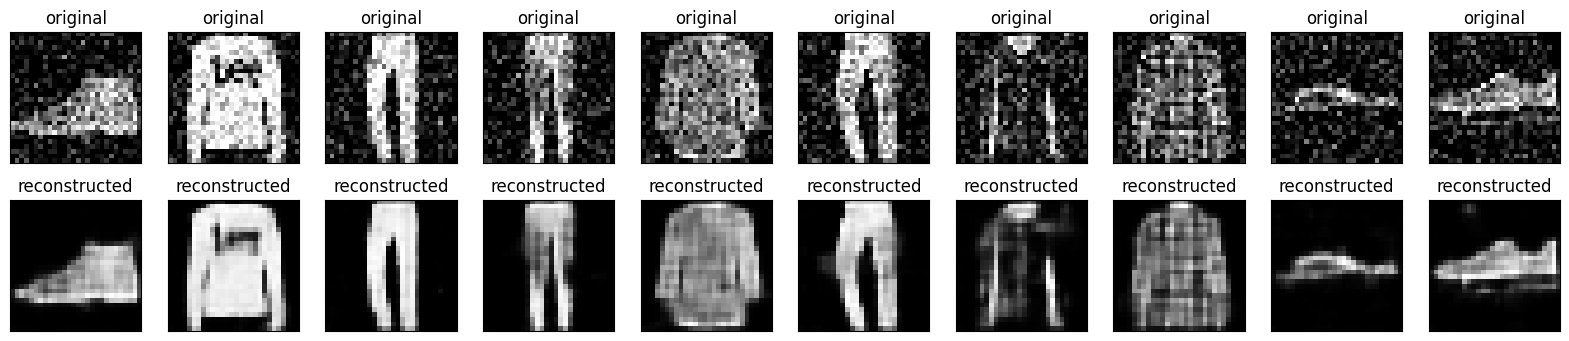

In [ ]:
plot_images(x_test_noisy, decoded_imgs, n=10)

#Image generation with diffusion models using Keras and TensorFlow


In [4]:
def make_diffusion_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    for i in range(10):
        model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.ReLU())
    model.add(tf.keras.layers.Conv2D(3, (1, 1), padding='same'))
    return model

def diffusion_process(x, timesteps=1000):
    for i in range(timesteps):
        noise = tf.random.normal(shape=x.shape)
        x = x + tf.math.sqrt(2.0 * 0.01) * noise
        x = x / tf.math.sqrt(1.0 + 2.0 * 0.01)
        x = make_diffusion_model()(x)
    return x

import tensorflow_datasets as tfds

def train_diffusion_model():
    dataset = tfds.load('cifar10', split='train', shuffle_files=True)
    dataset = dataset.batch(64).prefetch(tf.data.AUTOTUNE)
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
    for epoch in range(100):
        for batch in dataset:
            with tf.GradientTape() as tape:
                noise = tf.random.normal(shape=batch['image'].shape)
                diffused_noise = diffusion_process(noise)
                logits = make_diffusion_model()(diffused_noise, training=True)
                loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(batch['image'], logits))
            gradients = tape.gradient(loss, make_diffusion_model().trainable_variables)
            optimizer.apply_gradients(zip(gradients, make_diffusion_model().trainable_variables))
        print(f'Epoch {epoch + 1}, Loss: {loss.numpy()}')


# Save the weights of the trained model
# model.save_weights('diffusion_model.h5')
# Load the saved weights into a new model object
# model = make_diffusion_model()
# train_diffusion_model()
# new_model.load_weights('diffusion_model.h5')

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

dataset = tfds.load('cifar10', split='train', shuffle_files=True)
# dataset = dataset.batch(64).prefetch(tf.data.AUTOTUNE)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

dataset
for epoch in range(10):
  for batch in dataset:
    with tf.GradientTape() as tape:
      noise = tf.random.normal(shape=batch['image'].shape)
      diffused_noise = diffusion_process(noise)
      logits = make_diffusion_model()(diffused_noise, training=True)
      loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(batch['image'], logits))
    gradients = tape.gradient(loss, make_diffusion_model().trainable_variables)
    optimizer.apply_gradients(zip(gradients, make_diffusion_model().trainable_variables))

In [ ]:
import matplotlib.pyplot as plt
def generate_samples():
    noise = tf.random.normal(shape=(1, 32, 32, 3))
    diffused_noise = diffusion_process(noise)
    model = make_diffusion_model()
    model.load_weights('diffusion_model.h5')
    for i in range(10):
        logits = model(diffused_noise, training=False)
        probs = tf.nn.softmax(logits)
        sample = tf.random.categorical(probs, num_samples=1)
        sample = tf.squeeze(sample, axis=-1)
        sample = tf.cast(sample, tf.float32) / 255.0
        diffused_noise = diffusion_process(sample)
        plt.imshow(sample.numpy())
        plt.show()

In [6]:
def make_diffusion_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    for i in range(10):
        model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same'))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.ReLU())
    model.add(tf.keras.layers.Conv2D(3, (1, 1), padding='same'))
    return model

def diffusion_process(x, timesteps=1000):
    for i in range(timesteps):
        noise = tf.random.normal(shape=x.shape)
        x = x + tf.math.sqrt(2.0 * 0.01) * noise
        x = x / tf.math.sqrt(1.0 + 2.0 * 0.01)
        x = make_diffusion_model()(x)
    return x

import tensorflow_datasets as tfds

def train_diffusion_model():
    dataset = tfds.load('cifar10', split='train', shuffle_files=True)
    dataset = dataset.batch(64).prefetch(tf.data.AUTOTUNE)
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
    for epoch in range(100):
        for batch in dataset:
            with tf.GradientTape() as tape:
                noise = tf.random.normal(shape=batch['image'].shape)
                diffused_noise = diffusion_process(noise)
                logits = make_diffusion_model()(diffused_noise, training=True)
                loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(batch['image'], logits))
            gradients = tape.gradient(loss, make_diffusion_model().trainable_variables)
            optimizer.apply_gradients(zip(gradients, make_diffusion_model().trainable_variables))
        print(f'Epoch {epoch + 1}, Loss: {loss.numpy()}')

In [7]:
model = make_diffusion_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_11 (Ba  (None, 32, 32, 64)        256       
 tchNormalization)                                               
                                                                 
 re_lu_11 (ReLU)             (None, 32, 32, 64)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_12 (Ba  (None, 32, 32, 64)        256       
 tchNormalization)                                               
                                                                 
 re_lu_12 (ReLU)             (None, 32, 32, 64)       